In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

expected_action_value  = np.random.uniform(0 ,1 , 10)
optimal_bandit = np.argmax(expected_action_value)
num_epoch = 2000
print(optimal_bandit)
print(expected_action_value)

6
[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]


[0.696 0.286 0.227 0.551 0.719 0.423 0.981 0.685 0.481 0.392]
[0.699 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
[2000.    0.    0.    0.    0.    0.    0.    0.    0.    0.]


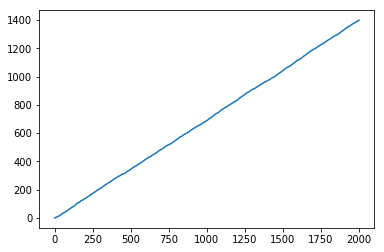

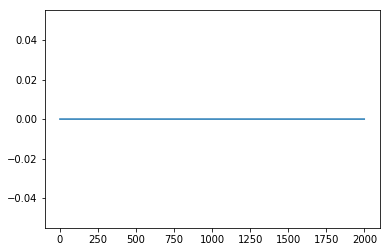

In [19]:
# one e
estimated = np.zeros(10)
pull_count             = np.zeros(10)
epsilon_value          = 0
reward_ot = [0]
optimal_ot= []

for iter in range(num_epoch):
    if np.random.uniform(0,1) > epsilon_value: current_choice = np.argmax(estimated)
    else : current_choice = np.random.choice(range(10))
    
    pull_count[current_choice] = pull_count[current_choice] + 1
    current_reward = 1 if expected_action_value[current_choice]>np.random.uniform(0,1) else 0
    estimated[current_choice] = estimated[current_choice] + (1/(pull_count[current_choice]+1)) * (current_reward - estimated[current_choice])
    
    reward_ot.append(current_reward+reward_ot[-1]); optimal_ot.append(current_choice == optimal_bandit)

    
print(np.around(expected_action_value,3))
print(np.around(estimated,3))
print(np.around(pull_count,3))

plt.plot(reward_ot);plt.show()
plt.plot(optimal_ot);plt.show()


In [4]:
# one e
estimated = np.zeros(10)
pull_count             = np.zeros(10)
epsilon_value          = 0.1

for iter in range(num_epoch):
    if np.random.uniform(0,1) > epsilon_value: current_choice = np.argmax(estimated)
    else : current_choice = np.random.choice(range(10))
    
    pull_count[current_choice] = pull_count[current_choice] + 1
    current_reward = 1 if expected_action_value[current_choice]>np.random.uniform(0,1) else 0
    estimated[current_choice] = estimated[current_choice] + (1/(pull_count[current_choice]+1)) * (current_reward - estimated[current_choice])
    
print(np.around(expected_action_value,3))
print(np.around(estimated,3))
print(np.around(pull_count,3))

[0.696 0.286 0.227 0.551 0.719 0.423 0.981 0.685 0.481 0.392]
[0.545 0.    0.375 0.556 0.667 0.333 0.984 0.824 0.286 0.385]
[ 10.   3.   7.   8.   8.  14. 916.  16.   6.  12.]


In [18]:
# one e
estimated = np.zeros(10)
pull_count             = np.zeros(10)
epsilon_value          = 0.5

for iter in range(num_epoch):
    if np.random.uniform(0,1) > epsilon_value: current_choice = np.argmax(estimated_action_value)
    else : current_choice = np.random.choice(range(10))
    
    pull_count[current_choice] = pull_count[current_choice] + 1
    current_reward = 1 if expected_action_value[current_choice]>np.random.uniform(0,1) else 0
    estimated[current_choice] = estimated[current_choice] + (1/(pull_count[current_choice]+1)) * (current_reward - estimated[current_choice])
    
print(np.around(expected_action_value,3))
print(np.around(estimated,3))
print(np.around(pull_count,3))

[0.696 0.286 0.227 0.551 0.719 0.423 0.981 0.685 0.481 0.392]
[0.687 0.29  0.265 0.547 0.75  0.451 0.982 0.627 0.509 0.412]
[535.  61.  48.  52.  39.  50.  55.  58.  52.  50.]


In [35]:
epsilon_values  = [0,0.01,0.1,1.0]
e_step = 0
estimated_action_value = np.zeros(10)

def reward_function(action_taken, expected_action_value):
    if (np.random.uniform(0, 1) <= expected_action_value[action_taken]):
        return(1)
    else:
        return(0)

def multi_arm_bandit_problem(arms = 10, steps = 1000, e = 0.1, expected_action_value = []):
    overall_reward, optimal_action = [], []
    estimate_action_value = np.zeros(arms)
    count = np.zeros(arms)
    for s in range(0, steps):
        e_estimator = np.random.uniform(0, 1)
        action = np.argmax(estimate_action_value) if e_estimator > e else np.random.choice(np.arange(10))
        reward = reward_function(action, expected_action_value)
        estimate_action_value[action] = estimate_action_value[action] + (1/(count[action]+1)) * (reward - estimate_action_value[action])
        overall_reward.append(reward)
        optimal_action.append(action == np.argmax(expected_action_value))
        count[action] += 1
    return(overall_reward, optimal_action)

def run_game(runs = 200, steps = 1000, arms = 10):
    rewards = np.zeros((runs, steps))
    optimal_actions = np.zeros((runs, steps))
    expected_action_value = np.random.uniform(0, 1 , arms)
    for run in range(0, runs):
        rewards[run][:], optimal_actions[run][:] = multi_arm_bandit_problem(arms = arms, steps = steps, e = epsilon_values[e_step], expected_action_value = expected_action_value)
    rewards_avg = np.average(rewards, axis = 0)
    optimal_action_perc = np.average(optimal_actions, axis = 0)
    return(rewards_avg, optimal_action_perc)

epsilon_values  = [0,0.01,0.1,1.0]
e_step = 0; one1,one11 = run_game()
e_step = 1; one2,one22 = run_game()
e_step = 2; one3,one33 = run_game()
e_step = 3; one4,one44 = run_game()

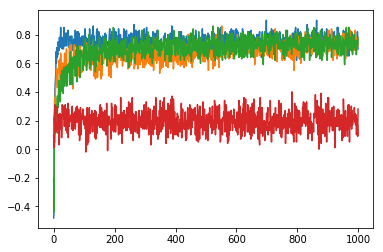

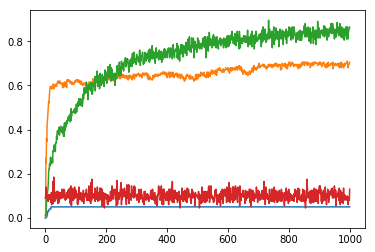

In [34]:
plt.plot(one1)
plt.plot(one2)
plt.plot(one3)
plt.plot(one4)
plt.show()

plt.plot(one11)
plt.plot(one22)
plt.plot(one33)
plt.plot(one44)
plt.show()